In [3]:
import torch

# 1. Data Manipulation

## 1.1. Getting Started

In [4]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [5]:
x.shape

torch.Size([12])

In [7]:
x.numel() # 몇 행 몇 열 등이 아니라 전체 원소 개수만 알고 싶을 경우.

12

### reshaping

In [8]:
X = x.reshape(3,4)

In [9]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

### zeros, ones, randn

randn은 N(0,1)에서 random sampling해오는 것

In [10]:
zero_mat = torch.zeros(2,3,4)
ones_mat = torch.ones(2,3,4)
rand_mat = torch.randn(2,3,4)

In [11]:
zero_mat, ones_mat, rand_mat

(tensor([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]),
 tensor([[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]),
 tensor([[[ 1.6706, -0.0711,  0.1695,  0.6723],
          [ 1.3995, -0.2891, -0.4646, -0.4699],
          [-0.4819,  0.4213, -0.0533,  0.7051]],
 
         [[-0.0724,  1.8489,  0.7747,  0.0172],
          [ 0.6169, -0.9331, -0.1167,  0.8067],
          [ 1.3114,  1.0331,  1.2929, -0.4310]]]))

## Operations

In [12]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [13]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [30]:
X = torch.arange(12, dtype=torch.float32).reshape(3,4)
Y = torch.tensor([[2.0, 1, 4, 3], [1,2,3,4], [4,3,2,1]])
torch.cat((X, Y), dim = 0), torch.cat((X, Y), dim = 1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [31]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [32]:
X.sum()

tensor(66.)

## 1.3. Broadcasting

In [33]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [34]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

shape이 안맞지만, element-wise하게 operation을 적용하고 싶을 때에는 operand matrix들이 해당 operands를 다 포함하는 큰 matrix에게 broadcasting 됨.

## 1.4. Indexing and Slicing

In [35]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [36]:
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [38]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

##  1.5. Saving Memory

In [39]:
before = id(Y)
Y = Y + X

In [40]:
id(Y) == before

False

기존 Y 자리에 있던 자료값이 변경이 되는 것이 아님. assign을 다시 할 경우, 새롭게 Y는 다른 메모리 주소를 가리키게 됨. -> 메모리 낭비일 뿐 아니라, 여러 변수가 하나의 메모리 주소를 가리키고 있을 경우 값의 업데이트가 다같이 이루어지지 않고 다른 변수는 이전값을 가리키고 있을 수 있음.

In [45]:
# Z[:] 에 할당을 함으로써 해결 가능

Z = torch.zeros_like(Y)
print('id(Z): ', id(Z))
Z[:] = X + Y # 값을 재할당해도
print('id(Z): ', id(Z)) # 메모리주소는 같은 곳을 pointing함.

id(Z):  3231630042176
id(Z):  3231630042176


In [46]:
before = id(X)
X += Y # 아니면 이 방법도 있음
id(X) == before

True

##  Conversion to Other Python objects

In [47]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [48]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# 2. Data Preprocessing

In [50]:
import os


os.makedirs(os.path.join('..', 'data'), exist_ok = True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,127500\n')
    f.write('4,NA,127500\n')
    f.write('NA,NA,140000\n')

In [51]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  127500
2       4.0   NaN  127500
3       NaN   NaN  140000


In [52]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [53]:
inputs = pd.get_dummies(inputs, dummy_na = True)

In [54]:
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [57]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 127500, 127500, 140000]))

# 3. Linear Algebra

## 3.1. scalars

In [59]:

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y , x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

## 3.2.vectors

In [60]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [61]:
x[3]

tensor(3)

In [62]:
len(x)

4

In [63]:
x.shape

torch.Size([4])

## 3.3. Matrices

In [64]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [65]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [66]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [67]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

## 3.4. Tensors

In [68]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

## 3.5. Basic properties of Tensor Arithmetic

In [69]:
A = torch.arange(20, dtype=torch.float32).reshape(5,4)
B = A.clone()
A, A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [70]:
A*B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [71]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a+X, (a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## 3.6. Reduction

In [72]:

x = torch.arange(4, dtype=torch.float32)
x = x.sum()

In [73]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [74]:
A_sum_axis0 = A.sum(axis=0) # axis 0끼리 더함
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [75]:
A_sum_axis1 = A.sum(axis=1)# axis 1끼리 더함
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [76]:
A.sum(axis=[0,1]) # A.sum()

tensor(190.)

In [77]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [78]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### Non-reduction Sum

In [82]:
# keepdims = True로 주면 됨.

sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape # (5,1)

(tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]),
 torch.Size([5, 1]))

In [80]:
A / sum_A # 각 행에 적용이 됨. 첫 행 -> 6으로 나눔 이런 식으로

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [84]:
A / A.sum(axis=1) # 이렇게 하면 runtime error

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

In [86]:
A.cumsum(axis=0), A

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

cumsum은 size에 아무런 영향을 주지 않음. (non-reduction form)

## 3.7. Dot products

In [88]:
x = torch.Tensor([0,1,2,3])
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [89]:
torch.sum(x * y)

tensor(6.)

## 3.8. matrix - vector dot products -> torch.mv 쓰면 됨.

In [90]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

## 3.9. mat-mat multiplication

In [92]:
B = torch.ones(4,3)
torch.mm(A,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

## 3.10. Norms

In [94]:
u = torch.tensor([3.0, -4.0])
torch.norm(u) # l2-norm

tensor(5.)

In [95]:
## l1 norm을 적용하고 싶다면,
torch.abs(u).sum()

tensor(7.)

In [96]:
## Frobenius norm -> l2 norm의 matrix 버전 정도로 생각?

torch.norm(torch.ones(4,9))

tensor(6.)

# 4. Calculus

## 4.1. Derivatives and Differentiation

In [103]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
    return 3*x **2 - 4*x

In [105]:
def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h

h = 0.1

for i in range(5):
    print(f'h={h:.5f}, numerical limit = {numerical_lim(f,1,h):.5f}')
    h *= 0.1

h=0.10000, numerical limit = 2.30000
h=0.01000, numerical limit = 2.03000
h=0.00100, numerical limit = 2.00300
h=0.00010, numerical limit = 2.00030
h=0.00001, numerical limit = 2.00003


In [106]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [107]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [109]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,ylim=None, xscale='linear', yscale='linear',fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []
        
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
        and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    
    if Y is None:
        X, Y = [[]] * len(X), X
    
    elif has_one_axis(Y):
        Y = [Y]
    
    if len(X) != len(Y):
        X = X * len(Y)
        axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

<ipython-input-106-f12f011abd37>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


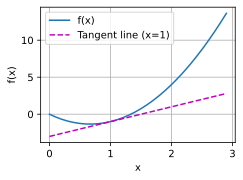

In [110]:
x = np.arange(0,3, 0.1)
plot(x, [f(x), 2*x-3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 5. Automatic Differentiation

## 1. simple example

In [18]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [19]:
x.requires_grad_(True)
x.grad

In [20]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [21]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [22]:
x.grad == 4*x

tensor([True, True, True, True])

In [23]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 5.2. Backward for Non-Scalar Variables

In [24]:
x.grad.zero_()
y = x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## 5.3. detaching computation

In [25]:
x.grad.zero_()
y = x*x
u = y.detach()
z = u*x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [26]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

## 5.4. Computing the Gradient of Python Control Flow

In [28]:
def f(a):
    b = a*2
    while b.norm() < 1000:
        b=b*2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    
    return c

In [29]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [30]:
a.grad == d / a

tensor(True)

# 6. Probability

## 6.1. Basic Prob Theory

In [111]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [112]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [113]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 4., 2., 1., 1., 2.])

In [114]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1690, 0.1620, 0.1760, 0.1460, 0.1880, 0.1590])

In [115]:
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

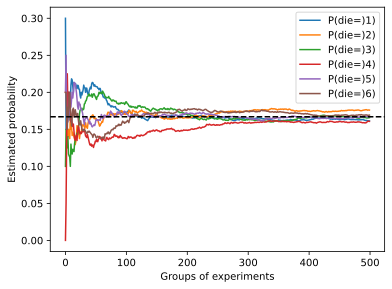

In [118]:
d2l.set_figsize((6,4.5))

for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                label=("P(die=)" + str(i+1) + ")"))
    
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

# 7. Documentation

## 7.1. Finding All the Functions and Classes in a Module

In [119]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__'

## 7.2. Finding the Usage of Specific Functions and Classes

In [121]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur

In [122]:
torch.ones(4)

tensor([1., 1., 1., 1.])